In [1]:
# Import relevant libraries
import os
import pandas as pd

from ModularCirc.Models.NaghaviModel import NaghaviModel, NaghaviModelParameters, TEMPLATE_TIME_SETUP_DICT

import numpy as np

from comparative_gsa.sample_input_space import sample_input_space
from comparative_gsa.simulate_data import simulate_data
from comparative_gsa.calculate_output_features import calculate_output_features

In [6]:
steps = {
    1,
    2,
    3,
}

param_path = '../inputs/parameters_naghavi_constrained_fixed_T_v_tot.json'
# Get the filename from the path, without extension
param_filename = os.path.splitext(os.path.basename(param_path))[0]

n_samples = 256


simulation_out_path = f'../outputs/simulations/output_{n_samples}_samples_{param_filename}/' 
#create folder if it does not exist
os.makedirs(simulation_out_path, exist_ok=True)


In [8]:
if 1 in steps:

    # Run sampling of the input space:
    br, simulation_out_path = sample_input_space(
        param_path=param_path,
        n_samples=n_samples
    )

In [9]:
if 2 in steps:

    simulations, bool_indices = simulate_data(
        batch_runner=br,
        simulation_out_path=simulation_out_path
    )

Running batch simulation with 256 samples...


100%|██████████| 256/256 [00:28<00:00,  9.08it/s]


[]


In [10]:
if 3 in steps:

    # Calculate output features
    summary_df = calculate_output_features(
        simulations=simulations,
        simulation_out_path=simulation_out_path)

Saved as simulation_summary.csv


In [8]:
# Train the emulators
# Load the simulation input parameters
input_params = pd.read_csv(os.path.join(simulation_out_path, f'input_samples_{n_samples}.csv'))

# Load the summary statistics
summary_stats = pd.read_csv(os.path.join(simulation_out_path, f'simulations_summary.csv'))

In [9]:
br._parameters_2_sample

{'ao.r': (195.0, 325.0),
 'ao.c': (0.22499999999999998, 0.375),
 'art.r': (843.75, 1406.25),
 'art.c': (2.25, 3.75),
 'ven.r': (6.75, 11.25),
 'ven.c': (84.975, 141.625),
 'av.r': (4.5, 7.5),
 'mv.r': (3.0749999999999997, 5.125),
 'la.E_pas': (0.22499999999999998, 0.375),
 'la.E_act': (0.41250000000000003, 0.6875),
 'la.v_ref': (6.75, 11.25),
 'la.k_pas': (0.01665, 0.07500000000000001),
 'lv.E_pas': (0.75, 1.25),
 'lv.E_act': (2.25, 3.75),
 'lv.v_ref': (7.5, 12.5),
 'lv.k_pas': (0.00999, 0.045)}

In [10]:
# Get column names for parameters up to 'T'
parameter_names = list(input_params.columns[:input_params.columns.get_loc('T') + 1])

input_params[parameter_names]

,ao.r,ao.c,art.r,art.c,ven.r,ven.c,av.r,mv.r,la.E_pas,la.E_act,...,la.v,la.delay,la.t_tr,la.tau,la.t_max,lv.delay,lv.t_tr,lv.tau,lv.t_max,T
0,305.576111,0.364705,1047.778645,2.796825,7.379755,116.738799,5.767604,3.872886,0.253016,0.650535,...,93,120.0,180.0,20.0,120.0,0,336.0,20.0,224.0,800
1,239.201979,0.294212,1290.672647,3.257753,10.025982,101.463371,6.617964,4.674997,0.357100,0.503905,...,93,120.0,180.0,20.0,120.0,0,336.0,20.0,224.0,800
2,218.335616,0.324832,910.186916,2.417528,10.382382,94.085593,5.249952,4.504283,0.334988,0.421357,...,93,120.0,180.0,20.0,120.0,0,336.0,20.0,224.0,800
3,277.901886,0.254335,1145.884560,3.622402,8.282241,137.229613,7.212086,3.251764,0.293604,0.550802,...,93,120.0,180.0,20.0,120.0,0,336.0,20.0,224.0,800
4,273.455547,0.305361,1370.442680,3.441763,8.862728,123.493007,4.754028,4.111263,0.314531,0.522093,...,93,120.0,180.0,20.0,120.0,0,336.0,20.0,224.0,800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2043,273.331190,0.254662,889.704303,3.145076,10.400144,100.856723,4.593032,4.225252,0.243955,0.433807,...,93,120.0,180.0,20.0,120.0,0,336.0,20.0,224.0,800
2044,278.025469,0.305661,1096.152814,3.337640,10.700488,86.282045,7.373448,3.274157,0.345412,0.676152,...,93,120.0,180.0,20.0,120.0,0,336.0,20.0,224.0,800
2045,218.255813,0.235456,1347.767227,2.714034,8.880499,127.656617,5.034850,4.585985,0.226839,0.547776,...,93,120.0,180.0,20.0,120.0,0,336.0,20.0,224.0,800
2046,239.284726,0.345498,949.703366,3.705230,6.992401,121.108687,6.455871,4.684628,0.277676,0.447713,...,93,120.0,180.0,20.0,120.0,0,336.0,20.0,224.0,800


In [ ]:
Y = summary_stats['p_ao_mean'].values

In [ ]:
em = AutoEmulate()
em.setup(X = input_params[parameter_names], 
         y = Y, 
         models = ['lgbm'],
         n_jobs=-1)

,Values
Simulation input shape (X),"(4082, 17)"
Simulation output shape (y),"(4082,)"
Proportion of data for testing (test_set_size),0.2
Scale input data (scale),True
Scaler (scaler),StandardScaler
Scale output data (scale_output),True
Scaler output (scaler_output),StandardScaler
Do hyperparameter search (param_search),False
Reduce input dimensionality (reduce_dim),False
Reduce output dimensionality (reduce_dim_output),False


In [ ]:
best_model = em.compare()

Cross-validating:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
em.summarise_cv()

,preprocessing,model,short,fold,rmse,r2
0,None,LightGBM,lgbm,2,28.476997,0.767840
1,None,LightGBM,lgbm,4,28.955925,0.745745
2,None,LightGBM,lgbm,3,29.202199,0.737434
3,None,LightGBM,lgbm,1,28.513422,0.720528
4,None,LightGBM,lgbm,0,32.368272,0.718860


In [ ]:
gp = em.get_model("lgbm")
em.evaluate(gp)

,model,short,preprocessing,rmse,r2
0,LightGBM,lgbm,None,26.4187,0.8028


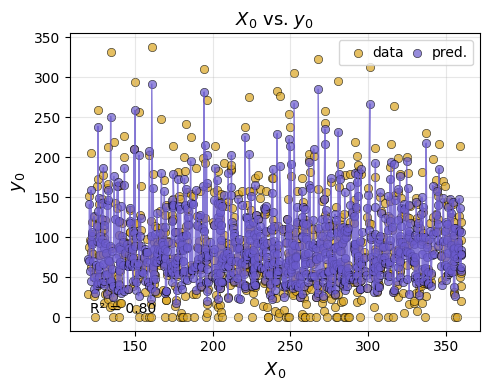

In [ ]:
em.plot_eval(gp)

In [ ]:
best_emulator = em.refit(gp)

In [ ]:
# Extract parameter names and bounds from the dictionary
parameters_range = br._parameters_2_sample

# Drop the 'v_tot' parameter if it exists
if 'v_tot' in parameters_range:
    del parameters_range['v_tot']

parameters_range

{'ao.r': (120.0, 360.0),
 'ao.c': (0.15, 0.44999999999999996),
 'art.r': (562.5, 1687.5),
 'art.c': (1.5, 4.5),
 'ven.r': (4.5, 13.5),
 'ven.c': (66.65, 199.95000000000002),
 'av.r': (3.0, 9.0),
 'mv.r': (2.05, 6.1499999999999995),
 'la.E_pas': (0.22, 0.66),
 'la.E_act': (0.225, 0.675),
 'la.v_ref': (5.0, 15.0),
 'la.k_pas': (0.01665, 0.07500000000000001),
 'lv.E_pas': (0.5, 1.5),
 'lv.E_act': (1.5, 4.5),
 'lv.v_ref': (5.0, 15.0),
 'lv.k_pas': (0.00999, 0.045),
 'T': (300.0, 1200.0)}

In [ ]:
parameter_names = list(parameters_range.keys())
parameter_bounds = list(parameters_range.values())

# Define the problem dictionary for Sobol sensitivity analysis
problem = {
    'num_vars': len(parameter_names),
    'names': parameter_names,
    'bounds': parameter_bounds
}

In [ ]:
df_sa = em.sensitivity_analysis(problem=problem)

17
17


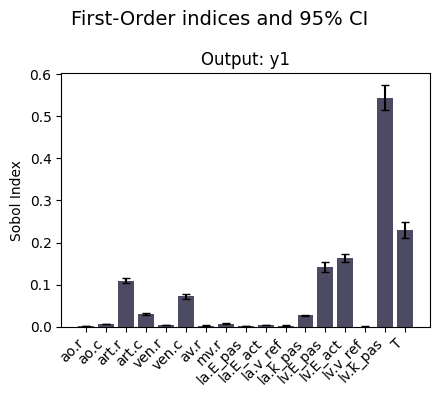

In [ ]:
em.plot_sensitivity_analysis(results = df_sa)